# TP3

## Integrantes

#### - Christopher Sebastian Charaf Herrera
#### - María Fabiana Cid
#### - Yessika Arrieta

TP3▪ Encontrar el logotipo de la gaseosa dentro de las imágenes provistas en Material TPs/TP3

### Images a partir del template Material_TPs/TP3/template

1. **(4 puntos)** Obtener una detección del logo en cada imagen sin falsos positivos.
2. **(4 puntos)** Plantear y validar un algoritmo para múltiples detecciones en la imagen `coca_multi.png` con el mismo template del ítem 1.
3. **(2 puntos)** Generalizar el algoritmo del ítem 2 para todas las imágenes. 

Visualizar los resultados con bounding boxes en cada imagen mostrando el nivel de confianza
de la detección.

In [46]:
#IMPORTS
%matplotlib inline

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

Imagen shape:(598, 799, 3)
Template shape:(175, 400)


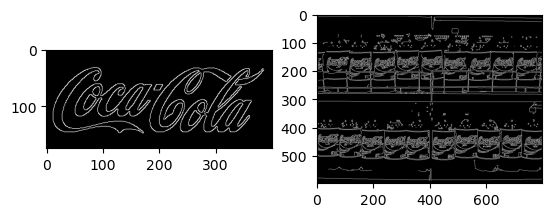

In [125]:
# Cargamos la imagen a procesar
img = cv.imread('./images/coca_multi.png')
template = cv.imread('./template/pattern.png',0)

img_rgb= cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_gray= cv.cvtColor(img, cv.COLOR_BGR2GRAY)


# Aplico Canny
#=============
template = cv.Canny(template, threshold1=100, threshold2=500)
img_gray = cv.Canny(img, threshold1=100, threshold2=600)


print('Imagen shape:' + str(img.shape))
print('Template shape:' + str(template.shape))



plt.figure()
plt.subplot(1,2,1)
plt.imshow(template, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(img_gray, cmap='gray')
plt.show()

Max value for cv.TM_CCOEFF at scale 0.20: 2581632.25


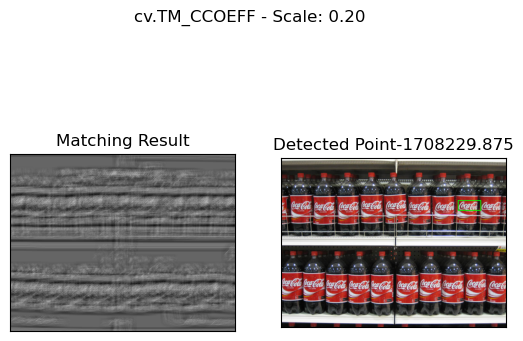

Max value for cv.TM_CCOEFF_NORMED at scale 0.20: 0.1375855803489685


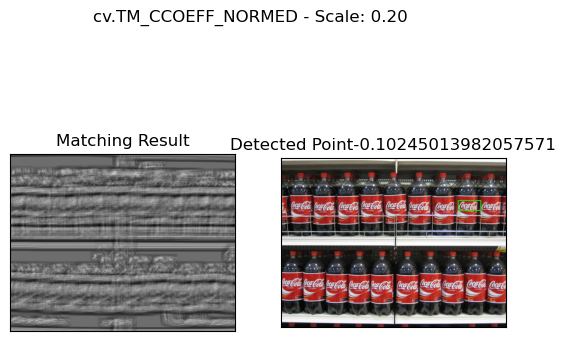

Max value for cv.TM_CCORR at scale 0.20: 5592150.0


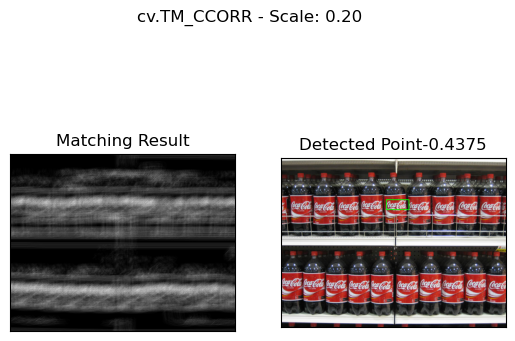

Max value for cv.TM_CCORR_NORMED at scale 0.20: 0.23820027709007263


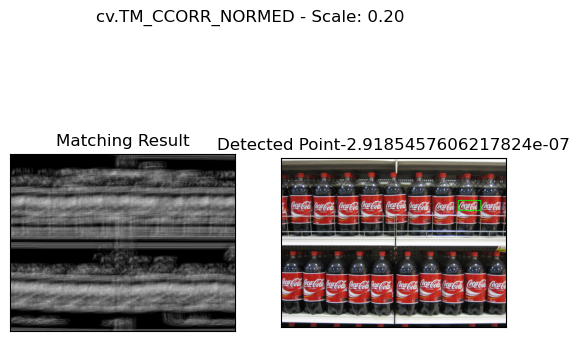

Min value for cv.TM_SQDIFF at scale 0.20: 11444400.0


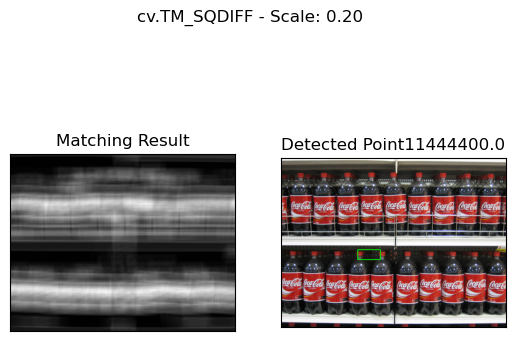

Min value for cv.TM_SQDIFF_NORMED at scale 0.20: 1.0


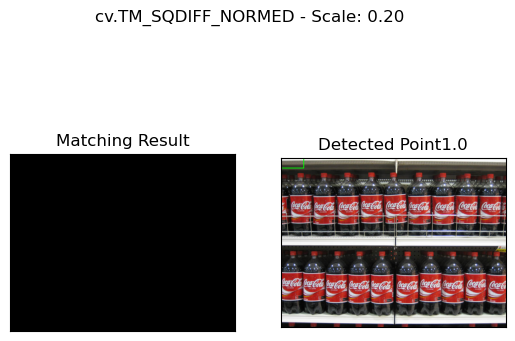

Max value for cv.TM_CCOEFF at scale 0.51: 6702606.5


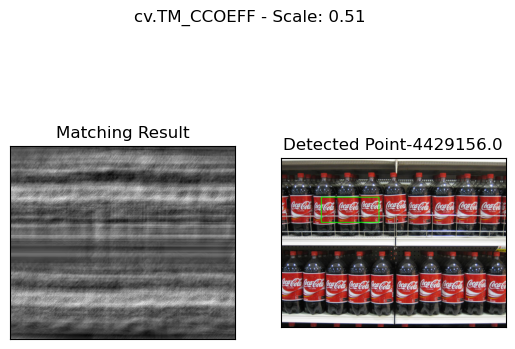

Max value for cv.TM_CCOEFF_NORMED at scale 0.51: 0.07957639545202255


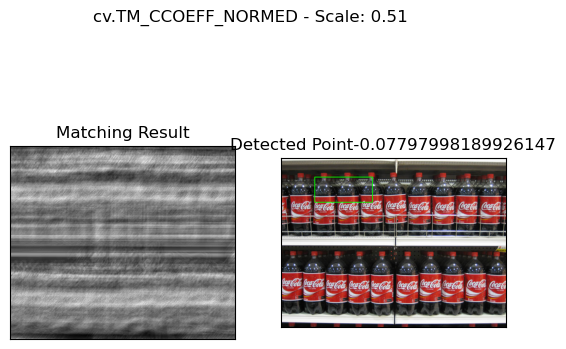

Max value for cv.TM_CCORR at scale 0.51: 20645816.0


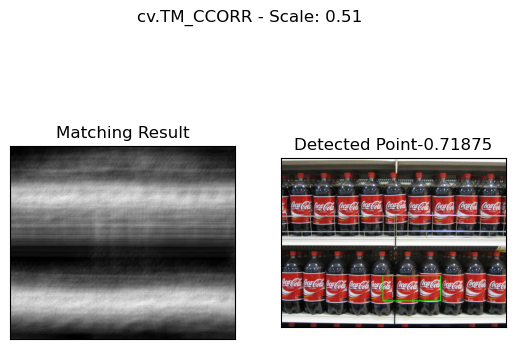

Max value for cv.TM_CCORR_NORMED at scale 0.51: 0.19440162181854248


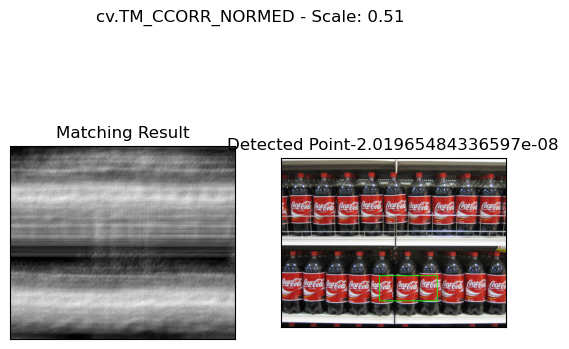

Min value for cv.TM_SQDIFF at scale 0.51: 58107472.0


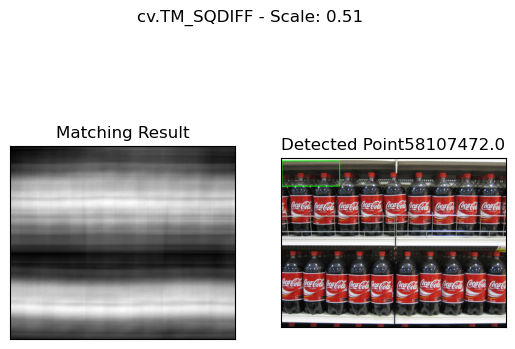

Min value for cv.TM_SQDIFF_NORMED at scale 0.51: 1.0


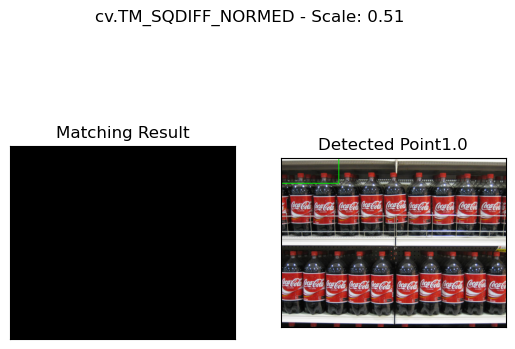

Max value for cv.TM_CCOEFF at scale 0.82: 14441129.0


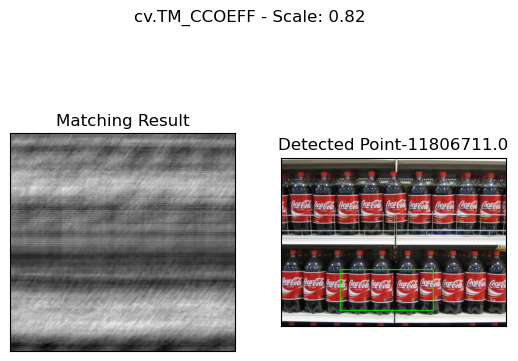

Max value for cv.TM_CCOEFF_NORMED at scale 0.82: 0.06524147838354111


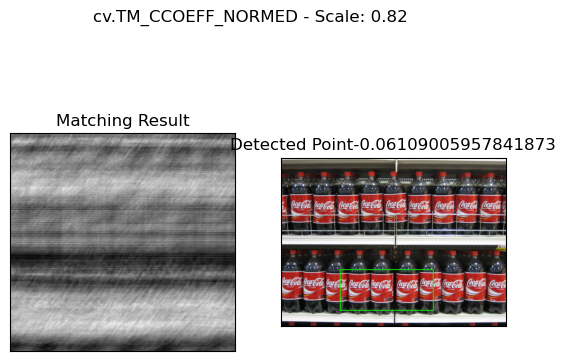

Max value for cv.TM_CCORR at scale 0.82: 44728780.0


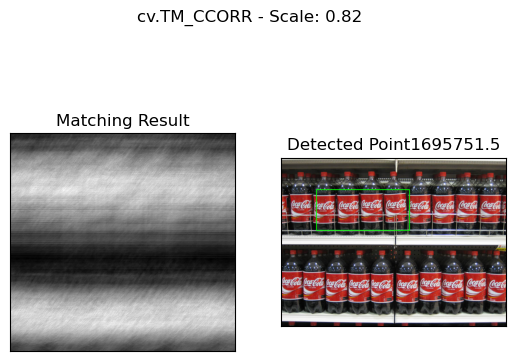

Max value for cv.TM_CCORR_NORMED at scale 0.82: 0.173113152384758


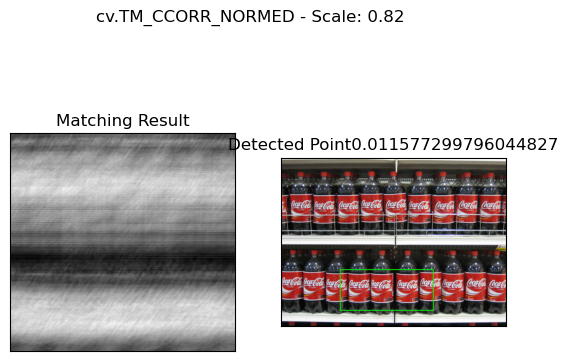

Min value for cv.TM_SQDIFF at scale 0.82: 239717824.0


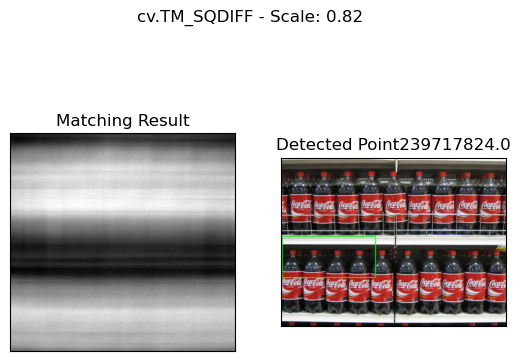

Min value for cv.TM_SQDIFF_NORMED at scale 0.82: 1.0


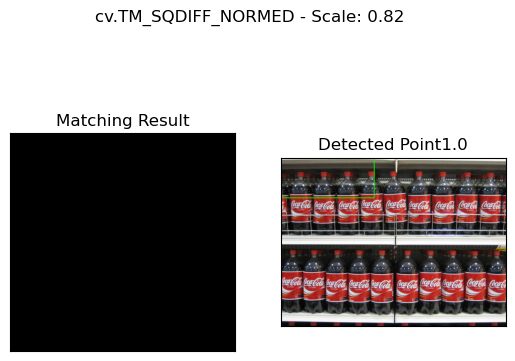

Max value for cv.TM_CCOEFF at scale 1.13: 28701890.0


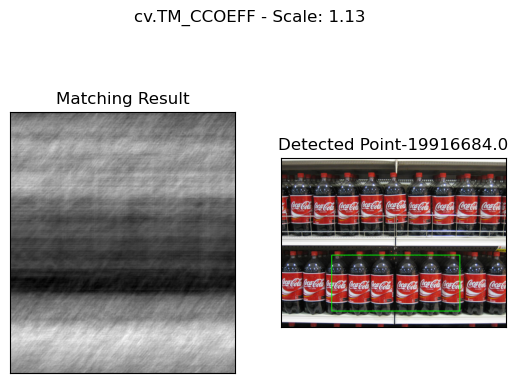

Max value for cv.TM_CCOEFF_NORMED at scale 1.13: 0.07725366950035095


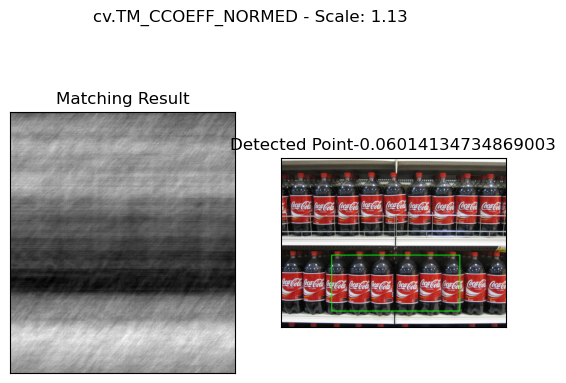

Max value for cv.TM_CCORR at scale 1.13: 71389280.0


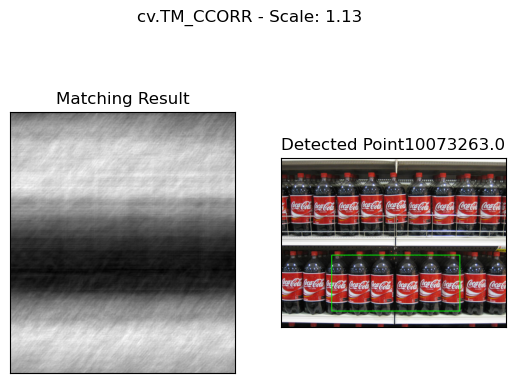

Max value for cv.TM_CCORR_NORMED at scale 1.13: 0.17223559319972992


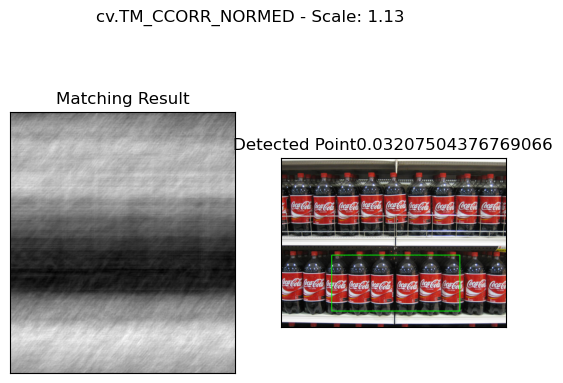

Min value for cv.TM_SQDIFF at scale 1.13: 571427456.0


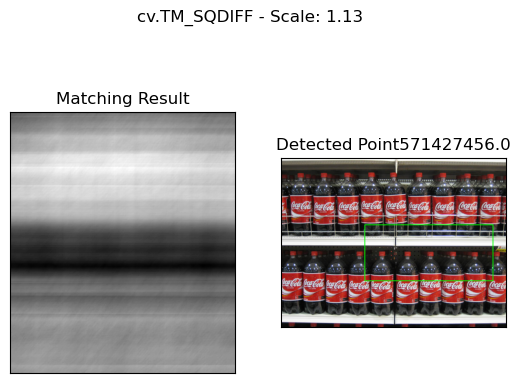

Min value for cv.TM_SQDIFF_NORMED at scale 1.13: 1.0


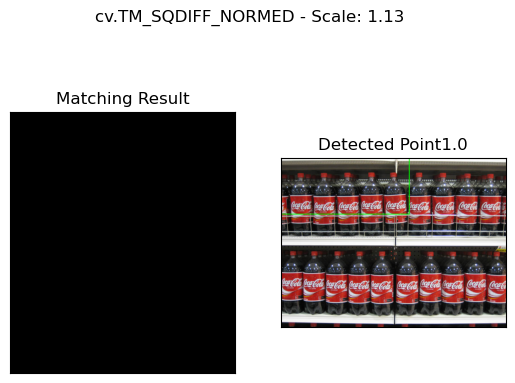

Max value for cv.TM_CCOEFF at scale 1.44: 39757376.0


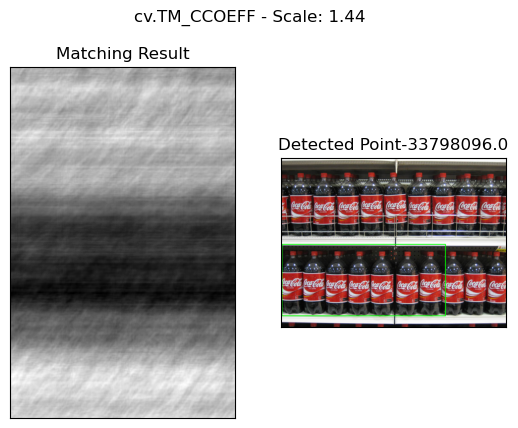

Max value for cv.TM_CCOEFF_NORMED at scale 1.44: 0.07213190943002701


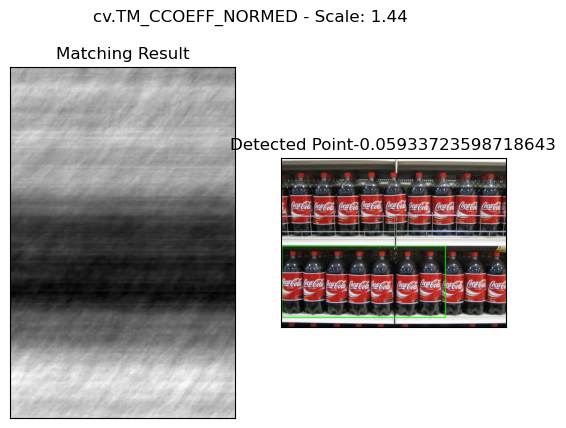

Max value for cv.TM_CCORR at scale 1.44: 107503144.0


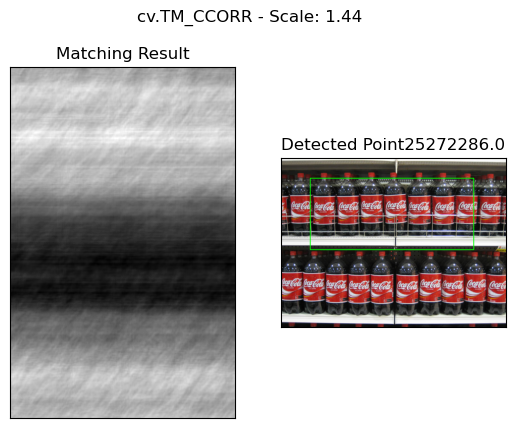

Max value for cv.TM_CCORR_NORMED at scale 1.44: 0.15832579135894775


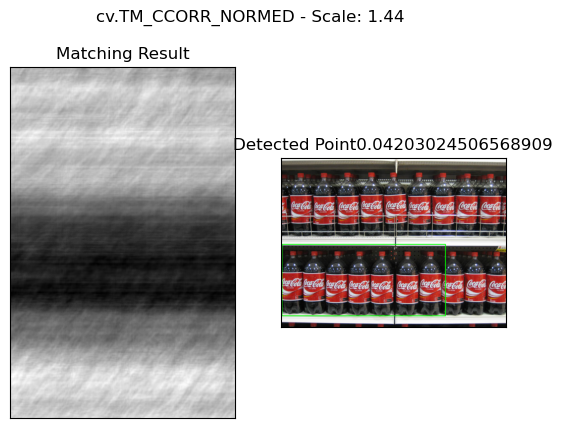

Min value for cv.TM_SQDIFF at scale 1.44: 1102297344.0


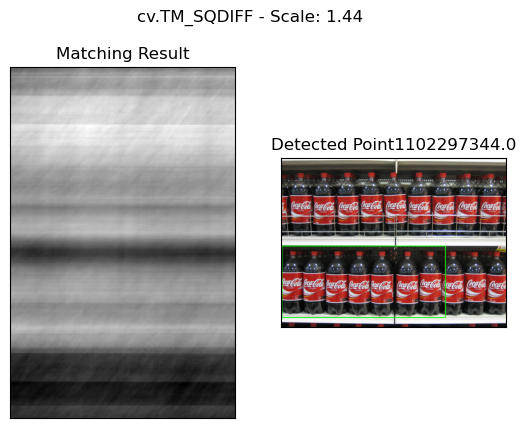

Min value for cv.TM_SQDIFF_NORMED at scale 1.44: 1.0


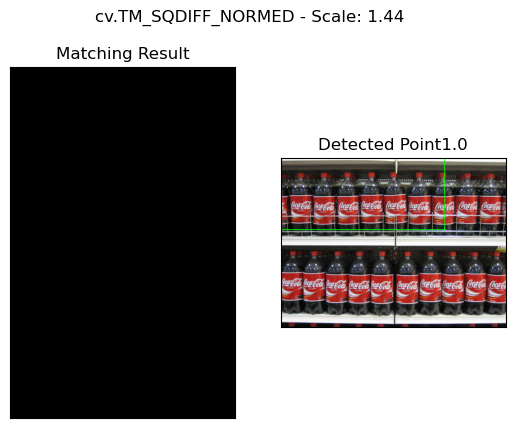

Max value for cv.TM_CCOEFF at scale 1.76: 49404056.0


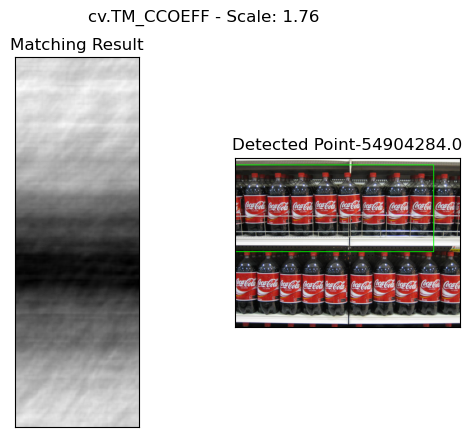

Max value for cv.TM_CCOEFF_NORMED at scale 1.76: 0.05945218354463577


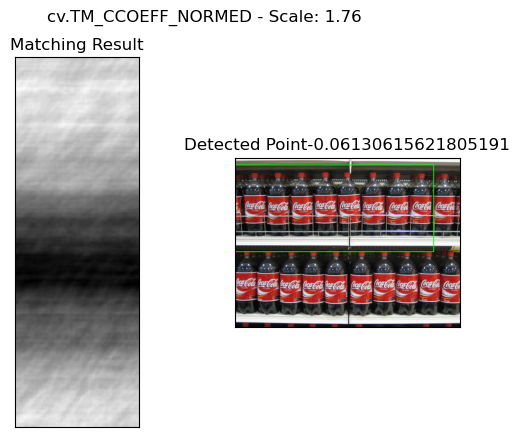

Max value for cv.TM_CCORR at scale 1.76: 136777184.0


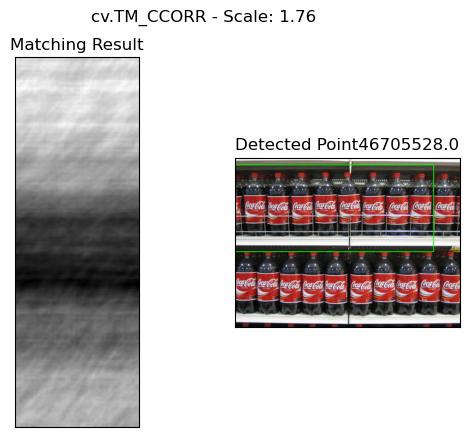

Max value for cv.TM_CCORR_NORMED at scale 1.76: 0.14893031120300293


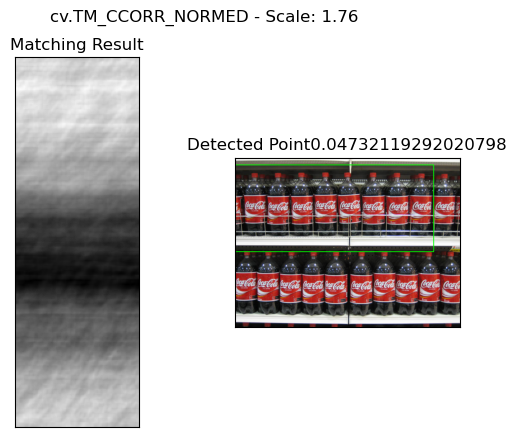

Min value for cv.TM_SQDIFF at scale 1.76: 1549151744.0


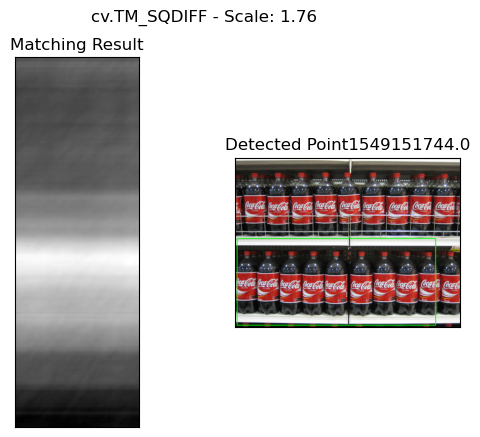

Min value for cv.TM_SQDIFF_NORMED at scale 1.76: 1.0


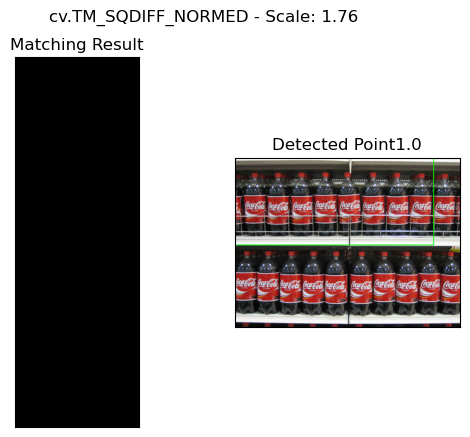

In [126]:
# Los 6 métodos posibles para comparación:
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

# Loop over different scales
for scale in np.linspace(0.2, 3, 10):
    resized_template = cv.resize(template, None, fx=scale, fy=scale)
    w, h = resized_template.shape[::-1]
    
    # Check if the resized template is larger than the image
    if resized_template.shape[0] > img_gray.shape[0] or resized_template.shape[1] > img_gray.shape[1]:
        continue
    
    for meth in methods:
        # Hago una copia de la imagen porque ciclo a ciclo le dibujo rectángulos
        img_salida = img_rgb.copy()
        
        method = eval(meth)
        
        # Aplicamos la coincidencia de patrones
        #--------------------------------------
        res = cv.matchTemplate(img_gray, resized_template, method)
        
        # Encontramos los valores máximos y mínimos
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
        
        # Si el método es TM_SQDIFF o TM_SQDIFF_NORMED, tomamos el mínimo
        if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
            top_left = min_loc
            print(f'Min value for {meth} at scale {scale:.2f}: {min_val}')
        else:
            top_left = max_loc
            print(f'Max value for {meth} at scale {scale:.2f}: {max_val}')
        
        # Marcamos
        bottom_right = (top_left[0] + w, top_left[1] + h)
        cv.rectangle(img_salida, top_left, bottom_right, (0,255,0), 2)
        
        # Graficamos el procesamiento y la salida
        #----------------------------------------
        plt.figure()
        
        # Resultado de coincidencia
        plt.subplot(121), plt.imshow(res, cmap='gray')
        plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
        
        # Imagen original con recuadros
        plt.subplot(122), plt.imshow(img_salida)
        plt.title('Detected Point' + str(min_val)), plt.xticks([]), plt.yticks([])
        plt.suptitle(f'{meth} - Scale: {scale:.2f}')
        plt.show()
